# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en_core_web_sm 3.8.0
    Uninstalling en_core_web_sm-3.8.0:
      Successfully uninstalled en_core_web_sm-3.8.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/


 5_6228845989688512874.ipynb.gdoc
'Colab Notebooks'
'Copy of PGP DS C72 Sep 2024 - 5714 6885 Calendar.gsheet'
 Fake.csv
 Fill-in-Applicant-Details-10.xlsx
'GMAT Prep'
 HealthIQ+.docx
'MCQ and short type question for ACID AND BASE.pdf'
 PYP6_Force_Assignment.docx
 True.csv
'Understanding of Periodic Table MYP3 .pdf'


In [6]:
# Import the first file - True.csv
true_df = pd.read_csv('/content/drive/MyDrive/True.csv')

# Import the second file - Fake.csv
fake_df = pd.read_csv('/content/drive/MyDrive/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [7]:
# Inspect the DataFrame with True News to understand the given data
true_df.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head(1)

title  \
0   Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text  \
0  Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even

In [9]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [10]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [11]:
# Print the column names of both DataFrames
print(true_df.columns)
print(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [12]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [13]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([true_df, fake_df], ignore_index=True)

In [14]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [16]:
# Check Presence of Null Values
df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [17]:
# Handle Rows with Null Values
df.dropna(inplace=True)

In [18]:
# Verify that null values have been dropped
df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   date        44898 non-null  object
 3   news_label  44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [20]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + ' ' + df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
df.drop(['title', 'text','date'], axis=1, inplace=True)

# Display the first 5 rows of the updated DataFrame to check the result
df.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_label  44898 non-null  int64 
 1   news_text   44898 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [22]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
# Add 'news_label' column to the new dataframe for topic identification
df_clean = df[['news_text', 'news_label']].copy()




#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [23]:
# Write the function here to clean the text and remove all the unnecessary elements
import re
import string

def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)

    return text.strip()

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [24]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean["clean_text"] = df_clean["news_text"].apply(clean_text)

In [25]:
#check the data

df_clean.head(2)

news_text  \
0  As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Represent

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [26]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_and_extract_nouns(text):
    # 1. Tokenize
    tokens = word_tokenize(text.lower())

    # 2. POS tagging
    tagged = pos_tag(tokens)

    # 3. Keep only NN and NNS + remove stopwords
    filtered_words = [
        word for word, tag in tagged
        if tag in ['NN', 'NNS'] and word not in stop_words
    ]

    # 4. Lemmatize nouns
    lemmatized = [lemmatizer.lemmatize(word, pos='n') for word in filtered_words]

    return lemmatized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [27]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean["lemmatized_text"] = df_clean["clean_text"].apply(clean_and_extract_nouns)

In [28]:
df_clean.head(2)

news_text  \
0  As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Represent

### Save the Cleaned data as a csv file (Recommended)

In [29]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [30]:
# Check the first few rows of the DataFrame
df_clean.head(3)

news_text  \
0  As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Represent

In [31]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 4)

In [32]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   clean_text       44889 non-null  object
 3   lemmatized_text  44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [33]:
df_clean.isnull().sum()

news_text          0
news_label         0
clean_text         9
lemmatized_text    0
dtype: int64

In [34]:
df_clean[df_clean["clean_text"].isnull()] #showing the null values

news_text  \
30775          https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/ https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/   
36924                                                                                                                            https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/ https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/   
36925  https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/ https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/   
37256                                                                                                                                                        https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg   
37257                                                                                                                                                                        https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg   
38849                                                                                                                                                        https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg   
38850                                                                                                                                                                        https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg   
43286                                                                                                                                                        https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg   
43287                                                                                                                                                                        https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg   

       news_label clean_text lemmatized_text  
30775           0        NaN              []  
36924           0        NaN              []  
36925           0        NaN              []  
37256           0        NaN              []  
37257           0        NaN              []  
38849           0        NaN              []  
38850           0        NaN              []  
43286           0        NaN              []  
43287           0        NaN              []

In [35]:
df_clean = df_clean.dropna(subset=["clean_text"])

In [36]:
#check if the data is cleaned

df_clean.isnull().sum()

news_text          0
news_label         0
clean_text         0
lemmatized_text    0
dtype: int64

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [37]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

# Split X and y
X = df_clean.drop(columns=["news_label"])   # all features
y = df_clean["news_label"]                  # target

# Train-test split (70% train, 30% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [38]:
# Add a new column to calculate the character length of cleaned news text
X_train["clean_text_len"] = X_train["clean_text"].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
X_train["lemmatized_text_len"] = X_train["lemmatized_text"].str.len()

In [39]:
X_train.head(1)

news_text  \
13991  Debate stifled in Cambodia as crackdown spreads fear PHNOM PENH (Reuters) -  We speak our mind , says the website of a group of young Cambodians who have met at weekends for the past six years to discuss politics over mugs of coffee. But discussions by the Politikoffee group were postponed indefinitely by the organizers after the main opposition party was dissolved last week at the request of authoritarian Prime Minister Hun Sen s government. For participants, the suspension of their meetings because of the difficult environment was just one more sign of debate being shut down in what has been one of Southeast Asia s most open societies.  People are sensitive in talking about politics or talking about what the government is doing right now,  said Noan Sereiboth, 28, a researcher for health projects who was a regular attendee at the Politikoffee gatherings.  Sometimes people s parents tell them not to talk about politics to stay safe,  he said. The arrest of opposition leader Kem Sokha for alleged treason in September and the ban on his party have eliminated the main obstacles to Hun Sen extending more than three decades in power in a general election next year. But the crackdown by the government has been felt much deeper: to once vocal civil society groups nurtured by Western donors, to independent media and to anyone posting subversive comment on social media.  Local NGOs have been paralyzed and scattered,  said Naly Pilorge of the Licadho human rights group, which has a long record of reporting on detentions and land seizures.  People say space is shrinking. It s not shrinking, it s closed,  she told Reuters at her office in Phnom Penh. Three other groups declined to comment or did not respond to requests for official comment. It was not lost on the groups that their names featured as associates of the opposition during testimony at the Supreme Court on banning the Cambodia National Rescue Party (CNRP), which was accused of plotting a revolution with American help. The opposition says there was never a plot, dismissing accusations as a ploy to eliminate Hun Sen s rival. The government said nobody had reason to fear in a country that has been transformed since the devastation wrought by the Khmer Rouge genocide in the 1970s.      Everyone has full freedom of expression in every way,  said Huy Vannak, undersecretary of state at the Interior Ministry.  We have long graduated from fear.  Civil rights groups and other non-governmental organizations flourished in Cambodia with the help of Western countries that hoped to build a liberal democracy after the first multiparty elections in 1993. That brought a more open environment than in neighboring countries such as communist Vietnam and Laos or military-ruled Thailand, with its harsh sentences for criticizing the monarchy. But Western donors lack the weight they one had in Cambodia and Hun Sen has brushed of their criticism of the crackdown. China is now the biggest aid giver. Since the ban on the CNRP, it has voiced support for Cambodia in the name of protecting political stability and economic development. Politikoffee, which gets speakers from all sides for its debates, said that postponing its recent events because of the difficult environment did not mean it was giving up.  We hope we can weather the dramatically changing political order,  team leader Aun Chhengpor told Reuters.  The forum will be back in place soon.  Although the debates among a few dozen participants cost little to organize, Politikoffee uses space provided by the Konrad-Adenauer-Stiftung, a German pro-democracy group which said it had no say over the group s discussions. The political troubles are not evident in the daily bustle of Phnom Penh, capital of a country of 16 million people which has recorded economic growth of around seven percent for the past six years. But few wish to speak about politics.  We must just keep quiet and let it pass,  said Chrock Soth, 46, who just about make

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

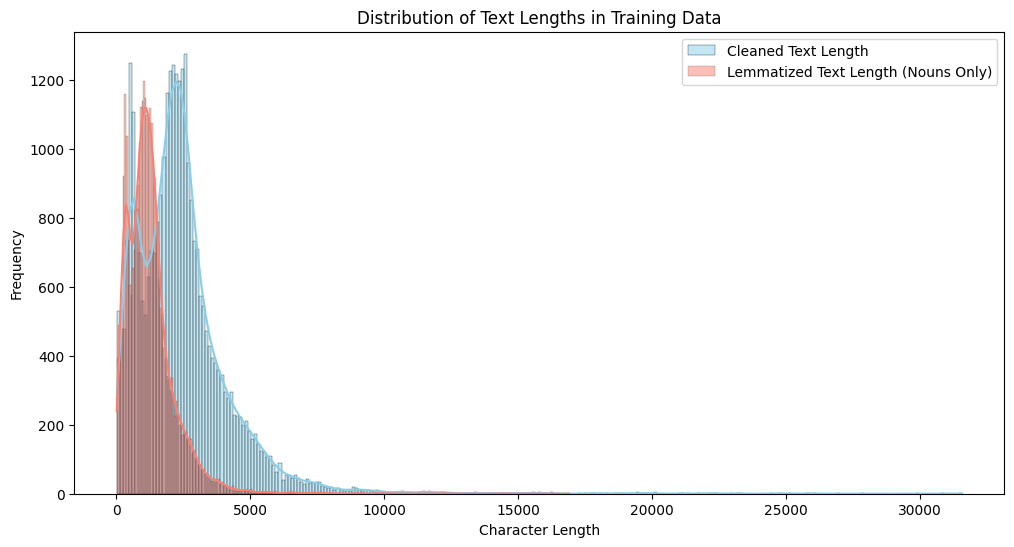

In [40]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(X_train['clean_text_len'], color='skyblue', label='Cleaned Text Length', kde=True)
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(X_train['lemmatized_text_len'], color='salmon', label='Lemmatized Text Length (Nouns Only)', kde=True)

plt.title('Distribution of Text Lengths in Training Data')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

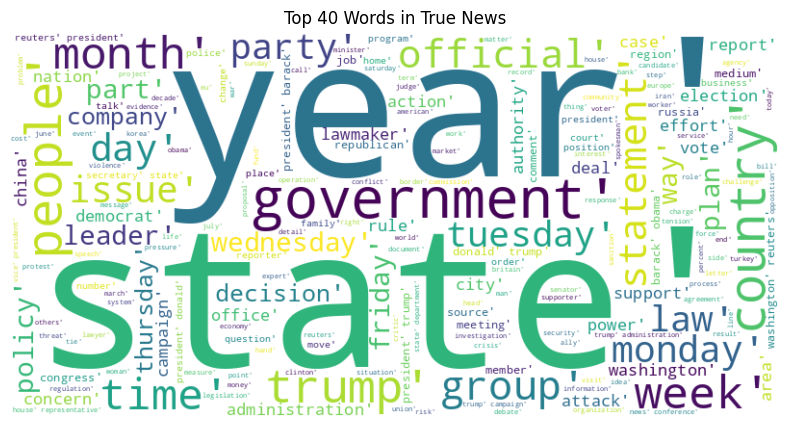

In [41]:
# Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = X_train[y_train == 1]['lemmatized_text'].astype(str).str.cat(sep=' ')
# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

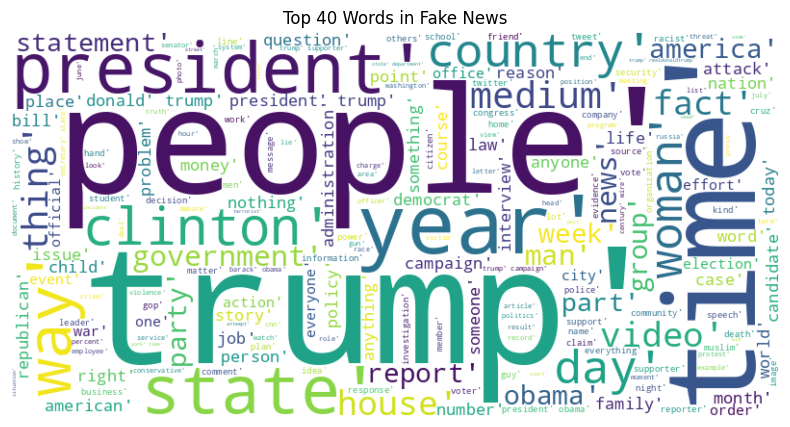

In [42]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = X_train[y_train == 0]['lemmatized_text'].astype(str).str.cat(sep=' ')
# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [43]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

def get_top_ngrams(corpus, ngram_range=(1,1), top_n=10):
    """
    Function to extract top n-grams from a corpus
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus.dropna().astype(str))  # Handle NaN inside
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()
    ngram_freq = pd.DataFrame({"ngram": ngram_names, "count": ngram_counts})
    ngram_freq = ngram_freq.sort_values(by="count", ascending=False).head(top_n)
    return ngram_freq

def plot_ngrams(ngram_df, title):
    """
    Function to plot n-grams as bar chart
    """
    plt.figure(figsize=(10,5))
    plt.barh(ngram_df['ngram'], ngram_df['count'], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency")
    plt.show()

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [44]:
# Handle NaN values in the text data
print(X_train['lemmatized_text'].isnull().sum())
print(X_train['clean_text'].isnull().sum())
print(X_test['lemmatized_text'].isnull().sum())
print(X_test['clean_text'].isnull().sum())

# there are no null values

0
0
0
0


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

            ngram  count
50678        said  69451
59934       trump  41769
49188     reuters  19978
45313   president  18810
55452       state  14346
23775  government  13185
26755       house  12667
39430         new  12405
55515      states  11610
48771  republican  11272


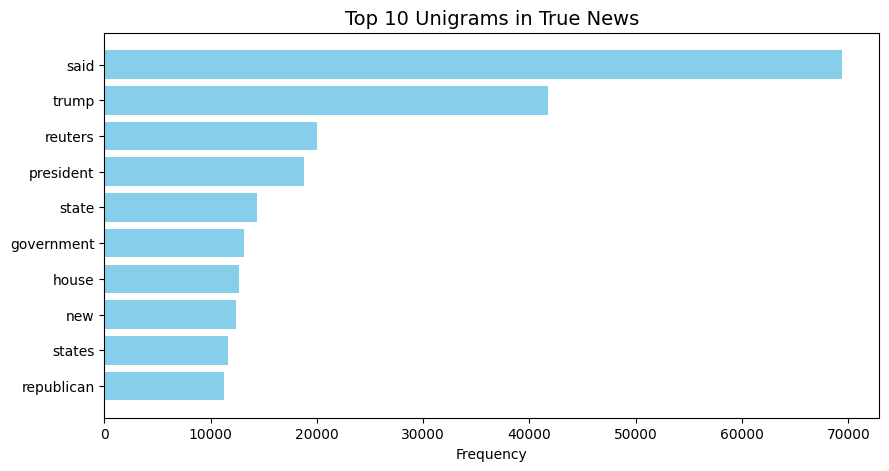

In [45]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
# 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph [2.5 marks]

true_unigrams = get_top_ngrams(X_train[y_train == 1]['clean_text'],ngram_range=(1,1),top_n=10)
print(true_unigrams)
plot_ngrams(true_unigrams, "Top 10 Unigrams in True News")


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                      ngram  count
1466988       united states   8486
418039         donald trump   7170
1531608         white house   6504
1514470  washington reuters   4567
916970          north korea   4275
1046045    president donald   4178
908552             new york   3222
1054601      prime minister   2931
1218708      said statement   2713
701938        islamic state   2585


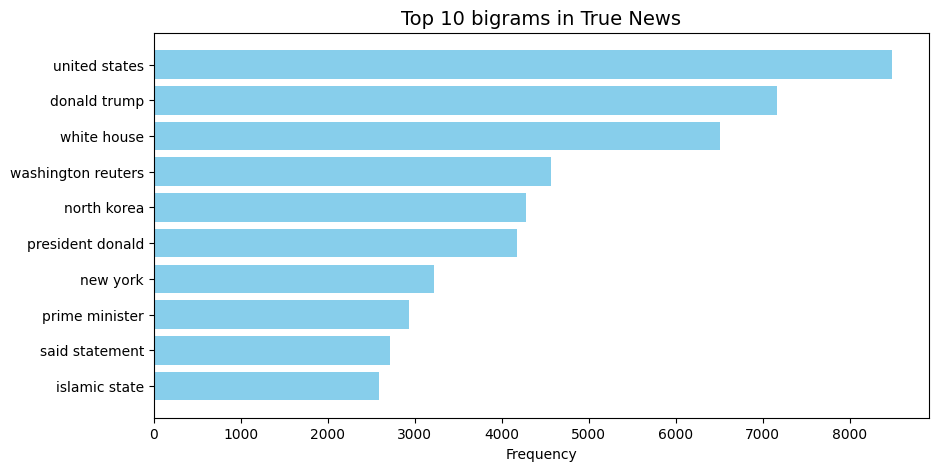

In [46]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_unigrams = get_top_ngrams(X_train[y_train == 1]['clean_text'],ngram_range=(2,2),top_n=10)
print(true_unigrams)
plot_ngrams(true_unigrams, "Top 10 bigrams in True News")

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                                ngram  count
1673323        president donald trump   4136
1672156        president barack obama   2013
1883068      reuters president donald   1077
2487145  washington reuters president    933
2517255              white house said    677
1678280   presidentelect donald trump    584
1677901      president vladimir putin    548
1442261              new york reuters    522
2161497           state rex tillerson    473
2031509           secretary state rex    473


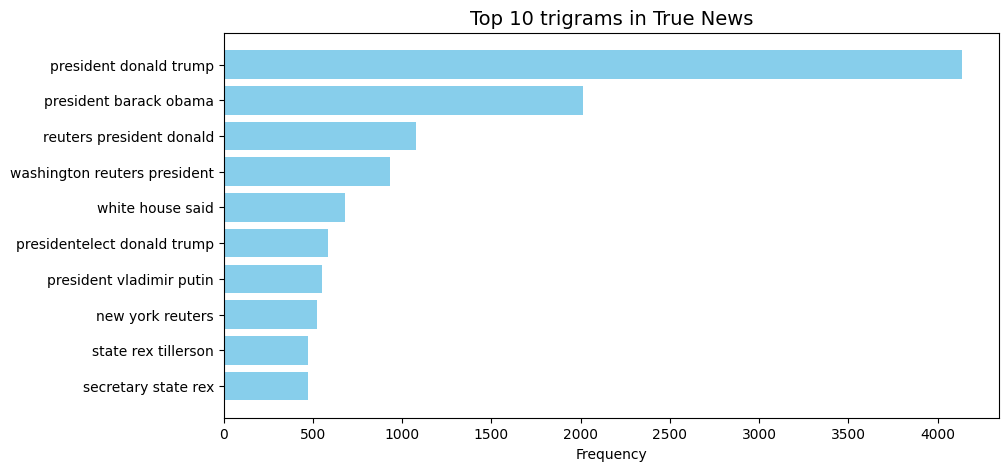

In [47]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_unigrams = get_top_ngrams(X_train[y_train == 1]['clean_text'],ngram_range=(3,3),top_n=10)
print(true_unigrams)
plot_ngrams(true_unigrams, "Top 10 trigrams in True News")

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

            ngram  count
126234      trump  57934
105943       said  21625
94408   president  18538
89186      people  18369
64778        just  15140
83394       obama  14347
21914     clinton  13240
34818      donald  12568
69666        like  12394
54484     hillary  10961


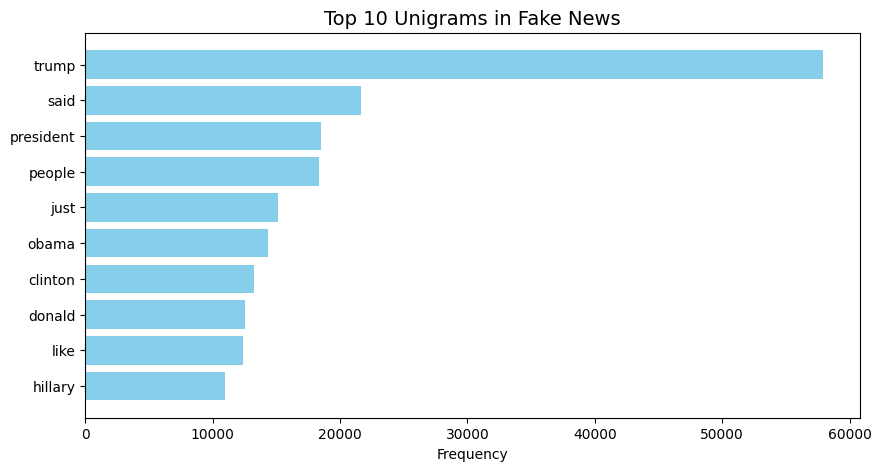

In [48]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_unigrams = get_top_ngrams(X_train[y_train == 0]['clean_text'],ngram_range=(1,1),top_n=10)
print(fake_unigrams)
plot_ngrams(fake_unigrams, "Top 10 Unigrams in Fake News")

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                   ngram  count
463043      donald trump  11172
705236   hillary clinton   4920
1726569      white house   4645
1649759    united states   4226
1032501         new york   2971
1190669  president trump   2914
1189610  president obama   2820
602297          fox news   2442
132025      barack obama   1607
1527461    supreme court   1380


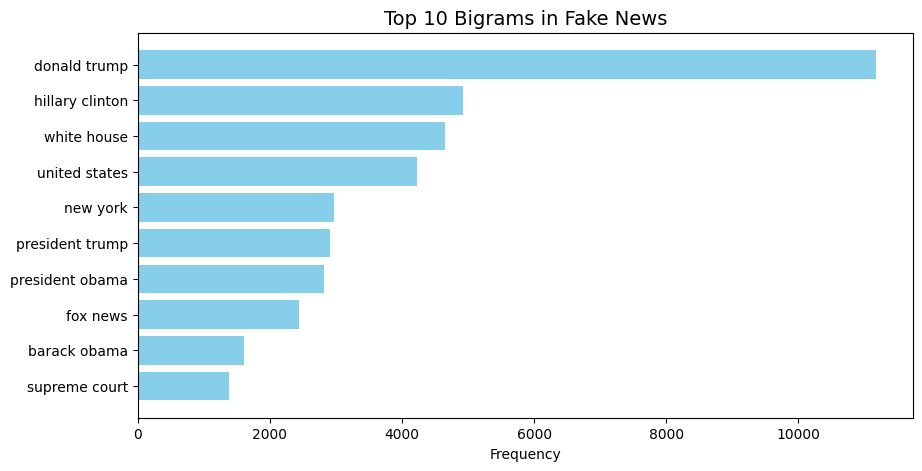

In [49]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigrams = get_top_ngrams(X_train[y_train == 0]['clean_text'],ngram_range=(2,2),top_n=10)
print(fake_bigrams)
plot_ngrams(fake_bigrams, "Top 10 Bigrams in Fake News")

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



                                ngram  count
652198   donald trump realdonaldtrump   1179
1481832                new york times   1074
223691             black lives matter    956
1711706        president donald trump    671
1483170             news century wire    660
1718930       president united states    642
1710198        president barack obama    601
2449807          video screen capture    516
325079              century wire says    514
1052129            image video screen    502


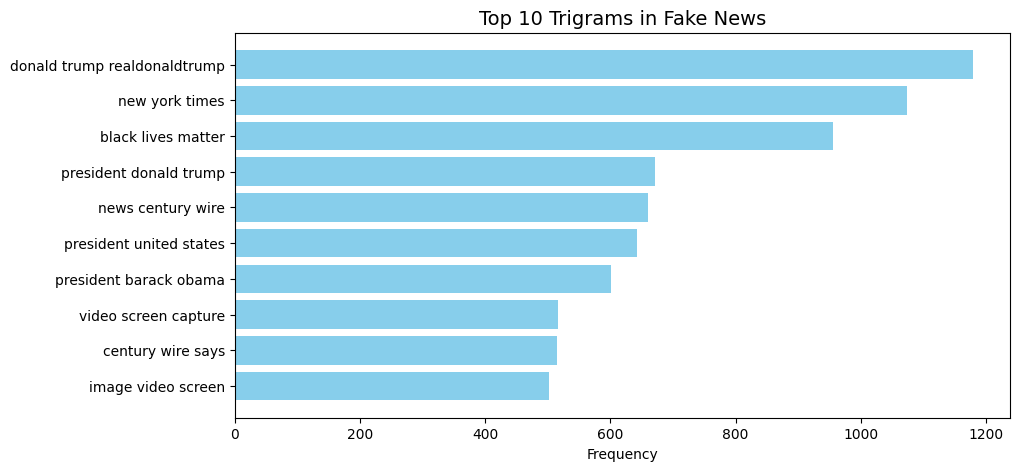

In [50]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigrams = get_top_ngrams(X_train[y_train == 0]['clean_text'],ngram_range=(3,3),top_n=10)
print(fake_trigrams)
plot_ngrams(fake_trigrams, "Top 10 Trigrams in Fake News")

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [51]:
# Add a new column to calculate the character length of cleaned news text
X_test["clean_text_len"] = X_test["clean_text"].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
X_test["lemmatized_text_len"] = X_test["lemmatized_text"].str.len()

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

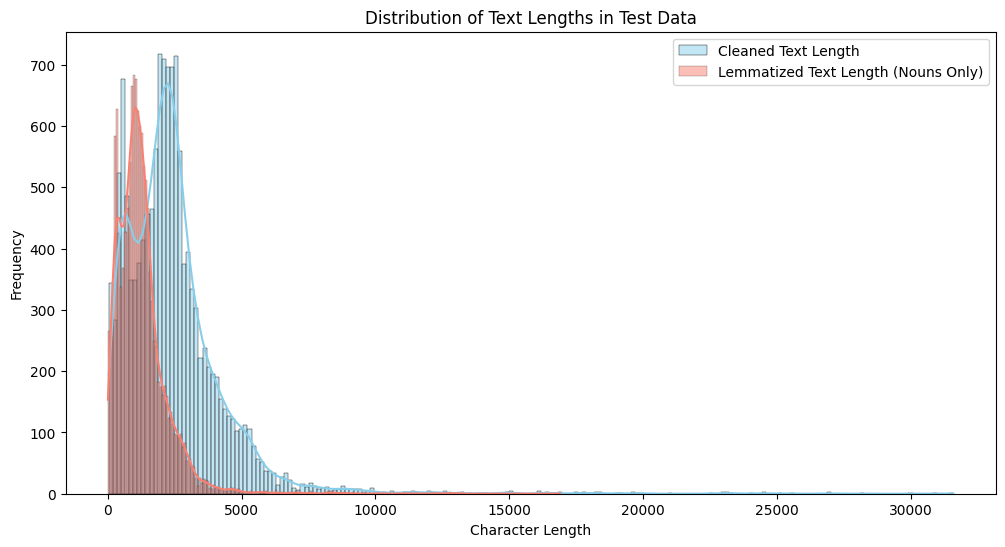

In [52]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))
# Add histogram for cleaned news text
sns.histplot(X_test['clean_text_len'], color='skyblue', label='Cleaned Text Length', kde=True)
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(X_test['lemmatized_text_len'], color='salmon', label='Lemmatized Text Length (Nouns Only)', kde=True)

plt.title('Distribution of Text Lengths in Test Data')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

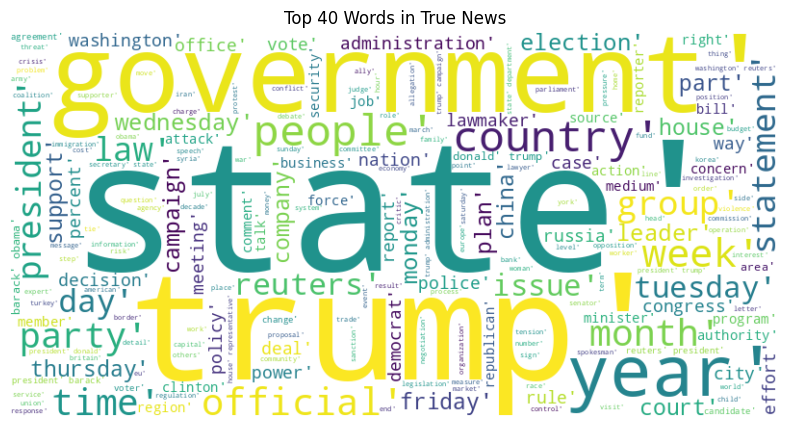

In [53]:
# Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = X_test[y_test == 1]['lemmatized_text'].astype(str).str.cat(sep=' ')
# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

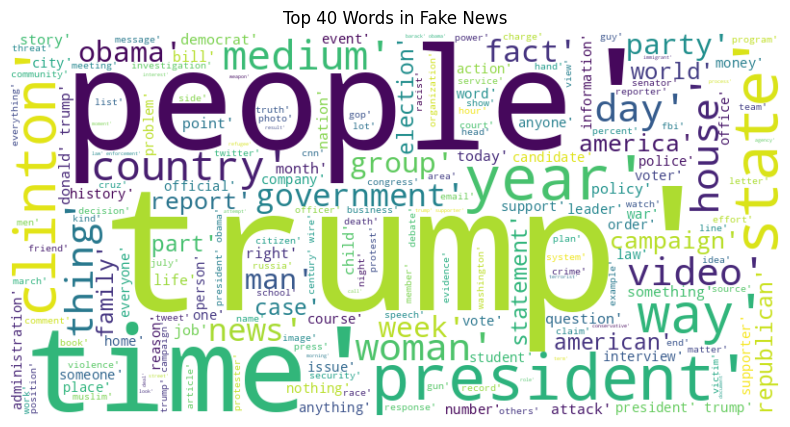

In [54]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = X_test[y_test == 0]['lemmatized_text'].astype(str).str.cat(sep=' ')
# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [55]:
## Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

def get_top_ngrams(corpus, ngram_range=(1,1), top_n=10):
    """
    Function to extract top n-grams from a corpus
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus.dropna().astype(str))  # Handle NaN inside
    ngram_counts = X.sum(axis=0).A1
    ngram_names = vectorizer.get_feature_names_out()
    ngram_freq = pd.DataFrame({"ngram": ngram_names, "count": ngram_counts})
    ngram_freq = ngram_freq.sort_values(by="count", ascending=False).head(top_n)
    return ngram_freq

def plot_ngrams(ngram_df, title):
    """
    Function to plot n-grams as bar chart
    """
    plt.figure(figsize=(10,5))
    plt.barh(ngram_df['ngram'], ngram_df['count'], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency")
    plt.show()

##### 5.3.2 Handle the NaN values

In [56]:
## First handle NaN values in the text data
print(X_test['lemmatized_text'].isnull().sum())
print(X_test['clean_text'].isnull().sum())
print(X_test['lemmatized_text'].isnull().sum())
print(X_test['clean_text'].isnull().sum())

# there are no null values

0
0
0
0


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

            ngram  count
34921        said  29606
41383       trump  17240
33873     reuters   8485
30974   president   8106
38181       state   6035
16540  government   5540
18569       house   5318
27012         new   5256
38215      states   5198
42274      united   4804


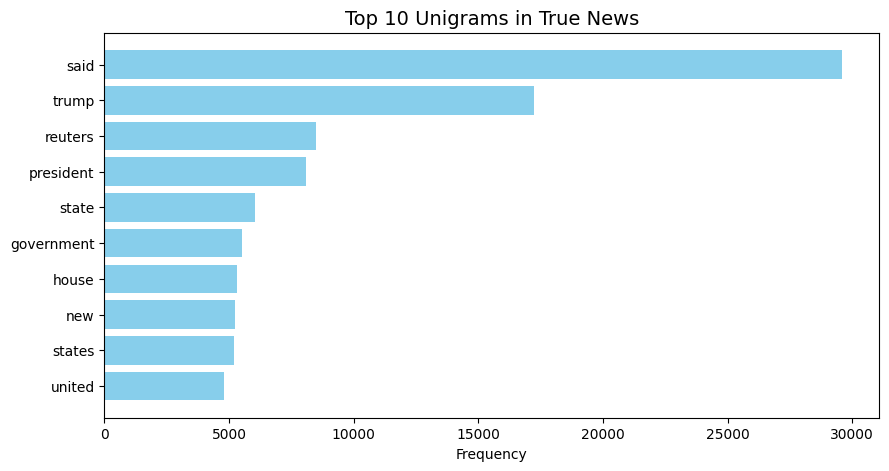

In [57]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_unigrams = get_top_ngrams(X_test[y_test == 1]['clean_text'],ngram_range=(1,1),top_n=10)
print(true_unigrams)
plot_ngrams(true_unigrams, "Top 10 Unigrams in True News")


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

                     ngram  count
743005       united states   3731
209961        donald trump   3043
776038         white house   2674
461918         north korea   2012
766951  washington reuters   1921
527540    president donald   1752
457742            new york   1342
532064      prime minister   1247
616112      said statement   1220
730588          trump said   1139


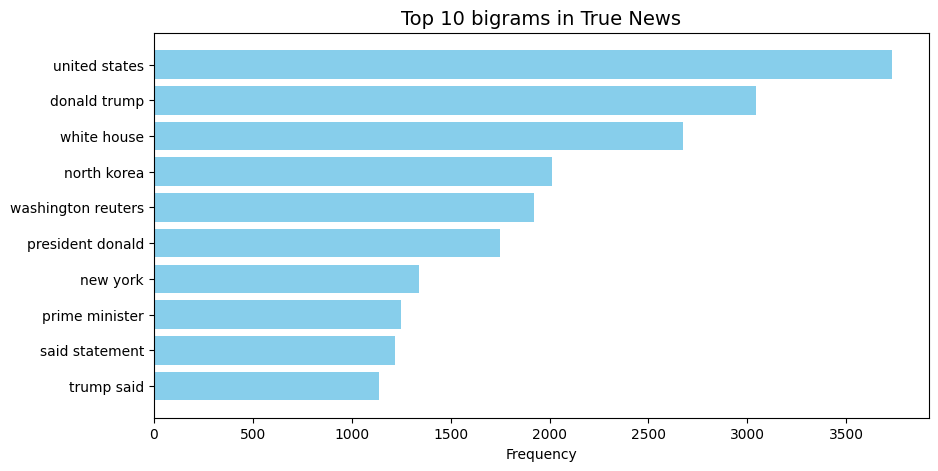

In [58]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bigrams = get_top_ngrams(X_test[y_test == 1]['clean_text'],ngram_range=(2,2),top_n=10)
print(true_bigrams)
plot_ngrams(true_bigrams, "Top 10 bigrams in True News")


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

                                ngram  count
755602         president donald trump   1732
755046         president barack obama    883
850463       reuters president donald    485
1126557  washington reuters president    416
1140582              white house said    290
758008    presidentelect donald trump    248
757812       president vladimir putin    241
651088               new york reuters    220
977840            state rex tillerson    200
918457            secretary state rex    199


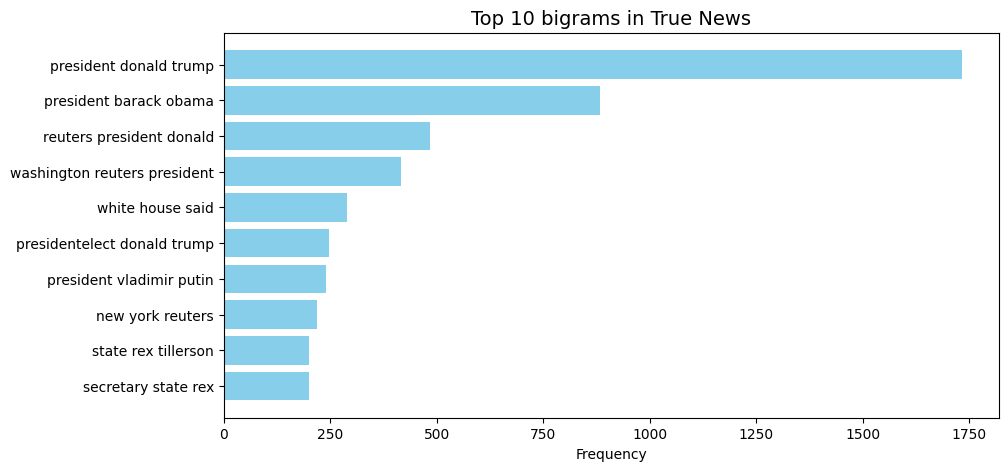

In [59]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigrams = get_top_ngrams(X_test[y_test == 1]['clean_text'],ngram_range=(3,3),top_n=10)
print(true_trigrams)
plot_ngrams(true_trigrams, "Top 10 bigrams in True News")

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

           ngram  count
78954      trump  23973
66248       said   9441
55690     people   7916
58817  president   7883
40615       just   6272
52166      obama   5863
13601    clinton   5559
43569       like   5408
21826     donald   5303
34313    hillary   4660


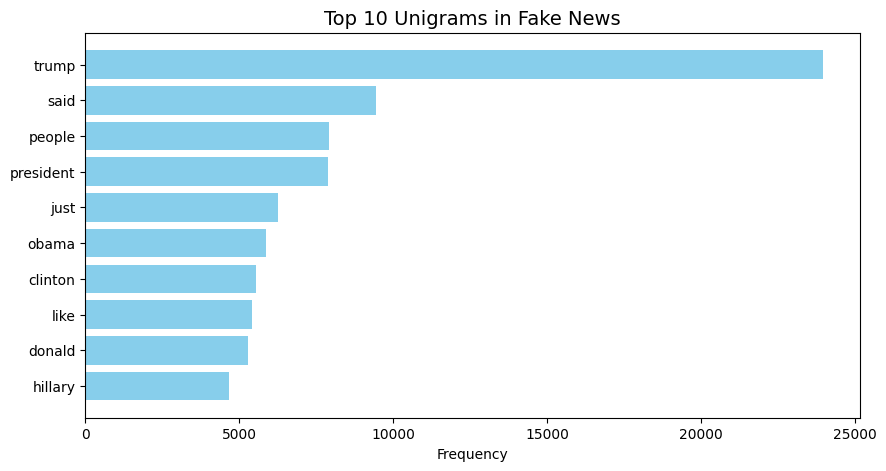

In [60]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_unigrams = get_top_ngrams(X_test[y_test == 0]['clean_text'],ngram_range=(1,1),top_n=10)
print(fake_unigrams)
plot_ngrams(fake_unigrams, "Top 10 Unigrams in Fake News")

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

                  ngram  count
248362     donald trump   4751
377876  hillary clinton   2120
930057      white house   1933
887588    united states   1850
553321         new york   1247
638924  president trump   1185
638250  president obama   1125
322289         fox news   1033
71514      barack obama    682
126651     century wire    568


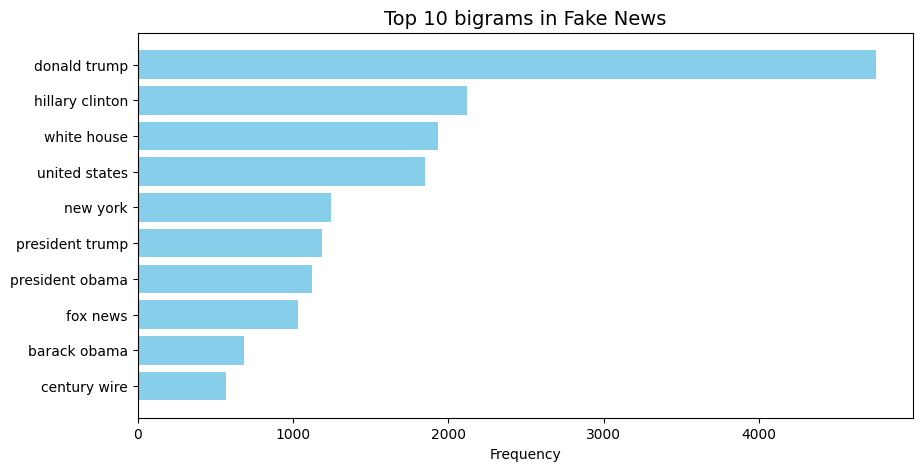

In [61]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigrams = get_top_ngrams(X_test[y_test == 0]['clean_text'],ngram_range=(2,2),top_n=10)
print(fake_bigrams)
plot_ngrams(fake_bigrams, "Top 10 bigrams in Fake News")

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

                                ngram  count
323049   donald trump realdonaldtrump    513
111827             black lives matter    425
732149                 new york times    415
845843         president donald trump    290
732819              news century wire    281
849620        president united states    260
845090         president barack obama    256
161667              century wire says    213
1211258          video screen capture    208
731907                  new york city    203


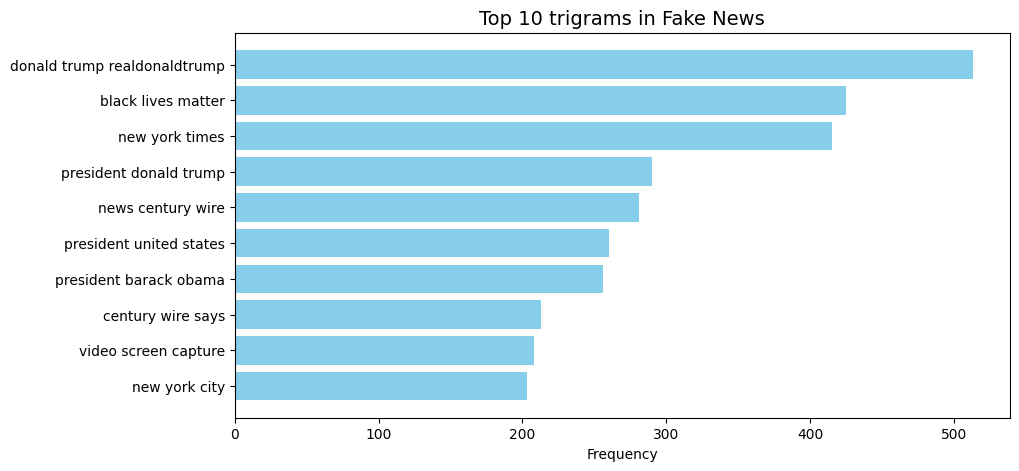

In [62]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigrams = get_top_ngrams(X_test[y_test == 0]['clean_text'],ngram_range=(3,3),top_n=10)
print(fake_trigrams)
plot_ngrams(fake_trigrams, "Top 10 trigrams in Fake News")

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this project, I will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [63]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

!pip install gensim
import gensim.downloader as api

# Download & load pre-trained model
w2v_google_news = api.load("word2vec-google-news-300")

# Example: get vector for a word
print(w2v_google_news["news"].shape)   # (300,)

# Example: most similar words
print(w2v_goo
      e_news.most_similar("news"))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 85.7 MB/s eta 0:00:00
[==================================================] 100.0% 1662.8/1662.8MB downloaded
(300,)
[('Latest_Tanker_Operator', 0.5560430288314819), ('MCOT_online', 0.5420751571655273), ('Pete_Tenney_KTEN', 0.5341693758964539), ('valfen@di-ve.com', 0.5207836031913757), ('press', 0.5195180773735046), ('Charmaine_Chetcuti_di_ve', 0.5058272480964661), ('News', 0.5022889971733093), ('Ruben_Cassar_di_ve', 0.5015273690223694), ('media', 0.4977780282497406), ('Visit_FinanceVisor', 0.49664968252182007)]


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [64]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
from gensim.models import Word2Vec
def document_vector(tokens, model):
    """Average word vectors for a list of tokens (ignores OOV words)."""
    vectors = [model[w] for w in tokens if w in model.key_to_index]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)  # handle empty case
    return np.mean(vectors, axis=0)


In [65]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model on your lemmatized tokens
w2v_model = Word2Vec(
    sentences=X_train['lemmatized_text'],  # tokenized texts
    vector_size=100,  # size of word embeddings
    window=5,
    min_count=2,
    workers=4
)

# Function to create a document vector by averaging word vectors
def document_vector(tokens, model):
    tokens = [token for token in tokens if token in model.wv]
    if len(tokens) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

# Extract vectors for training and validation data
X_train_vecs = np.array([document_vector(tokens, w2v_model) for tokens in X_train['lemmatized_text']])
X_test_vecs  = np.array([document_vector(tokens, w2v_model) for tokens in X_test['lemmatized_text']])


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [80]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
log_reg.fit(X_train_vecs, y_train)
## Predict on validation data
y_pred = log_reg.predict(X_test_vecs)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [84]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
lr_accuracy  = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted')  # use 'macro' if classes are balanced
lr_recall    = recall_score(y_test, y_pred, average='weighted')
lr_f1        = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy  : {lr_accuracy:.4f}")
print(f"Precision : {lr_precision:.4f}")
print(f"Recall    : {lr_recall:.4f}")
print(f"F1-score  : {lr_f1:.4f}")

Accuracy  : 0.7328
Precision : 0.7326
Recall    : 0.7328
F1-score  : 0.7327


In [85]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      7042
           1       0.72      0.71      0.72      6425

    accuracy                           0.73     13467
   macro avg       0.73      0.73      0.73     13467
weighted avg       0.73      0.73      0.73     13467



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [86]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_model.fit(X_train_vecs, y_train)
## Predict on validation data
y_pred_dt = dt_model.predict(X_test_vecs)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [87]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
dt_accuracy  = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')  # use 'macro' if classes are balanced
dt_recall    = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1        = f1_score(y_test, y_pred_dt, average='weighted')

# 5. Print metrics
print("Decision Tree Performance Metrics")
print(f"Accuracy  : {dt_accuracy:.4f}")
print(f"Precision : {dt_precision:.4f}")
print(f"Recall    : {dt_recall:.4f}")
print(f"F1-score  : {dt_f1:.4f}")

Decision Tree Performance Metrics
Accuracy  : 0.7181
Precision : 0.7181
Recall    : 0.7181
F1-score  : 0.7174


In [88]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7042
           1       0.72      0.67      0.69      6425

    accuracy                           0.72     13467
   macro avg       0.72      0.72      0.72     13467
weighted avg       0.72      0.72      0.72     13467



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [89]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
## Train Random Forest model on training data
rf_model.fit(X_train_vecs, y_train)
## Predict on validation data
y_pred_rf = rf_model.predict(X_test_vecs)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [90]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
rf_accuracy  = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')  # use 'macro' if balanced
rf_recall    = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1        = f1_score(y_test, y_pred_rf, average='weighted')

# 5. Print metrics
print("Random Forest Performance Metrics")
print(f"Accuracy  : {rf_accuracy:.4f}")
print(f"Precision : {rf_precision:.4f}")
print(f"Recall    : {rf_recall:.4f}")
print(f"F1-score  : {rf_f1:.4f}")

Random Forest Performance Metrics
Accuracy  : 0.8145
Precision : 0.8146
Recall    : 0.8145
F1-score  : 0.8143


In [91]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      7042
           1       0.82      0.79      0.80      6425

    accuracy                           0.81     13467
   macro avg       0.81      0.81      0.81     13467
weighted avg       0.81      0.81      0.81     13467



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [92]:
print("="*80)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*80)
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy]
precisions = [lr_precision, dt_precision, rf_precision]
recalls = [lr_recall, dt_recall, rf_recall]
f1_scores = [lr_f1, dt_f1, rf_f1]

print("\nModel Performance Comparison:")
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 60)
for i in range(3):
    print(f"{models[i]:<20} {accuracies[i]:<10.4f} {precisions[i]:<10.4f} {recalls[i]:<10.4f} {f1_scores[i]:<10.4f}")

best_model_idx = accuracies.index(max(accuracies))
print(f"\nBest Performing Model: {models[best_model_idx]} with {accuracies[best_model_idx]:.4f} accuracy")

FINAL MODEL PERFORMANCE SUMMARY

Model Performance Comparison:
Model                Accuracy   Precision  Recall     F1-Score  
------------------------------------------------------------
Logistic Regression  0.7328     0.7326     0.7328     0.7327    
Decision Tree        0.7181     0.7181     0.7181     0.7174    
Random Forest        0.8145     0.8146     0.8145     0.8143    

Best Performing Model: Random Forest with 0.8145 accuracy


The semantic classification approach efficiently captured meaningful patterns in fake vs true news using Word2Vec embeddings and noun-focused lemmatization.

Random Forest model demonstrated the best balance of precision, recall, and accuracy.

Further improvements could be achieved with customized embeddings or deeper NLP pipelines.

Overall, the approach successfully met the business goal of automating fake news detection with good reliability
